# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

Вариант 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import image as mpimg

In [13]:
def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
    plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
    plt.show()

# Задача 1.1

## Пункт 1

### Прямоугольное окно

<IPython.core.display.Javascript object>


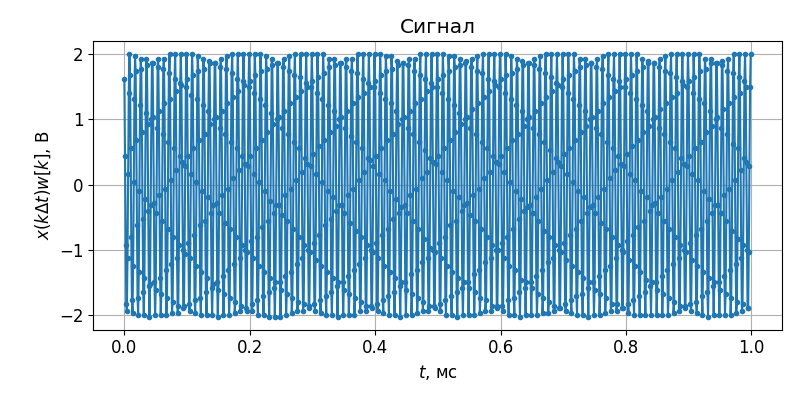

<IPython.core.display.Javascript object>


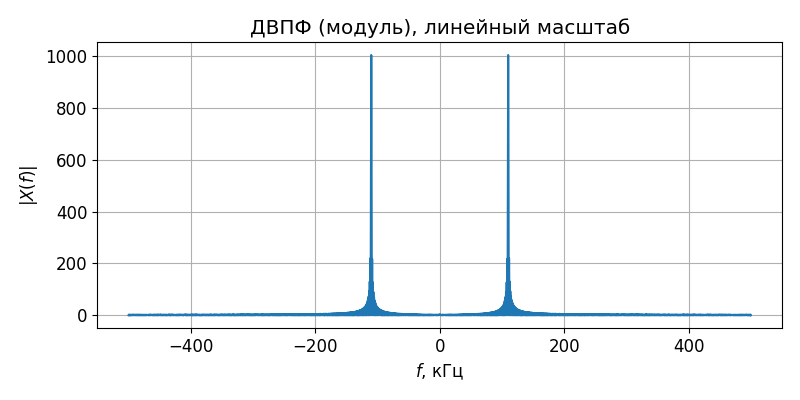

<IPython.core.display.Javascript object>


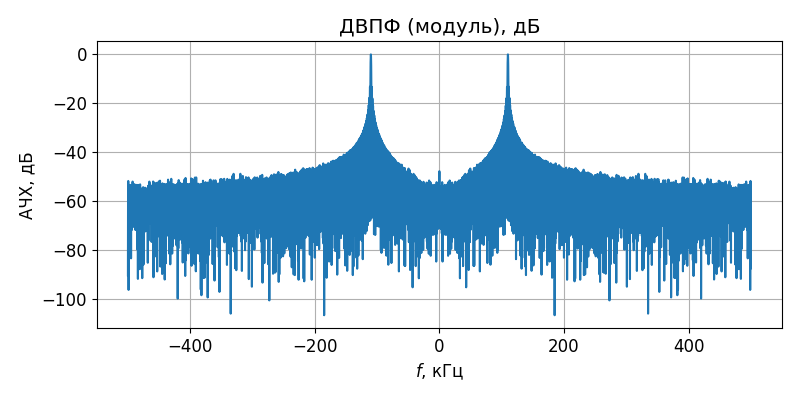

<IPython.core.display.Javascript object>


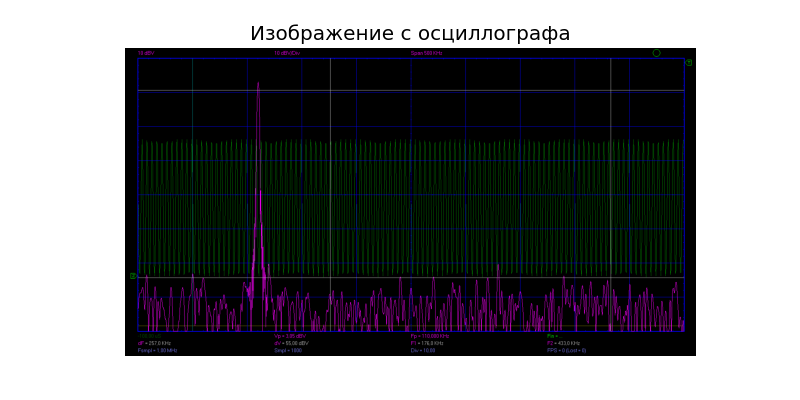

In [14]:
analyse(file='1.1(1).txt', const_level=2, window='boxcar')

# Результат
 * Максимум спектра сигнала находится на частоте 110кГц (частота синусоиды)

 * Ширина главного лепестка на нулевом уровне 2 кГц. С табличным значением совпадает.

 * Ширина главного лепестка спектра на уровне -3 дБ $\approx$ 0.9 кГц = 0.9 бин \
    Ширина главного лепестка спектра на уровне -6 дБ $\approx$ 1.2 кГц = 1.2 бин
    
 * Уровень максимального бокового лепестка спектра относительно главного = -13.2 дБ (теория -13.3 дБ)

 * Относительный уровень шумов квантования в дБ с теоретическим значением для 8- разрядного АЦП = -60 дБ

### Окно Ханна

<IPython.core.display.Javascript object>


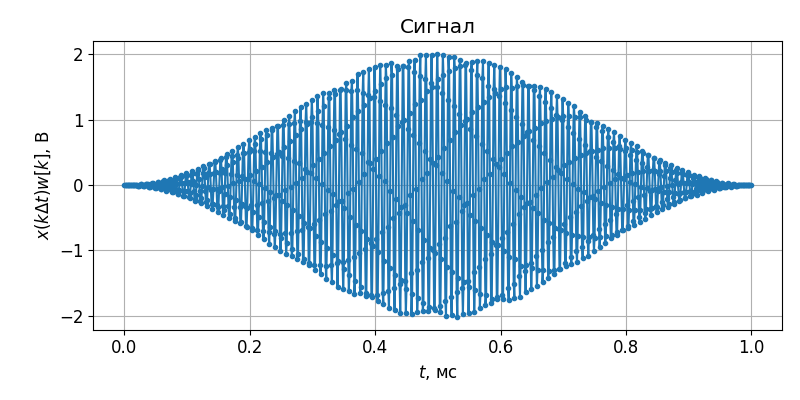

<IPython.core.display.Javascript object>


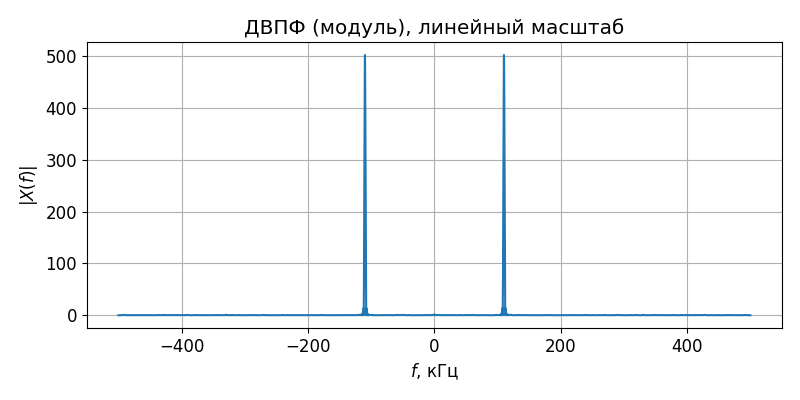

<IPython.core.display.Javascript object>


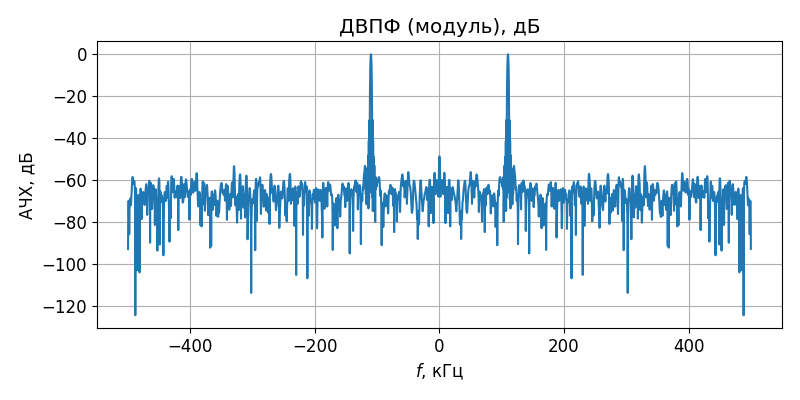

<IPython.core.display.Javascript object>


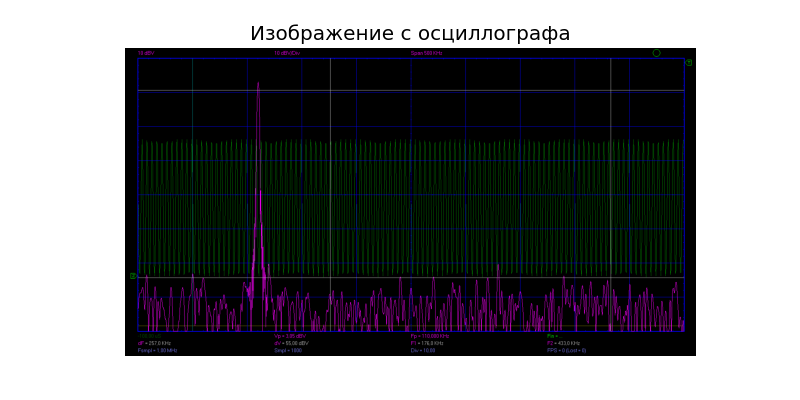

In [15]:
analyse(file='1.1(1).txt', const_level=2, window='hann')

##### Результат
 * Максимум спектра сигнала находится на частоте 110кГц (частота синусоиды)

 * Ширина главного лепестка на нулевом уровне - 4 кГц. С табличным значением совпадает.

 * Ширина главного лепестка спектра на уровне -3 дБ $\approx$ 1.45 кГц = 1.45 бин \
    Ширина главного лепестка спектра на уровне -6 дБ $\approx$ 2 кГц = 2 бин
    
 * Уровень максимального бокового лепестка спектра относительно главного = -31.4 дБ (теория -31.5 дБ)

 * Относительный уровень шумов квантования в дБ с теоретическим значением для 8- разрядного АЦП = -60 дБ

## Пункт 2

### Прямоугольное окно

Установим на генераторе синусоидальный сигнал с частотой 725 кГц

<IPython.core.display.Javascript object>


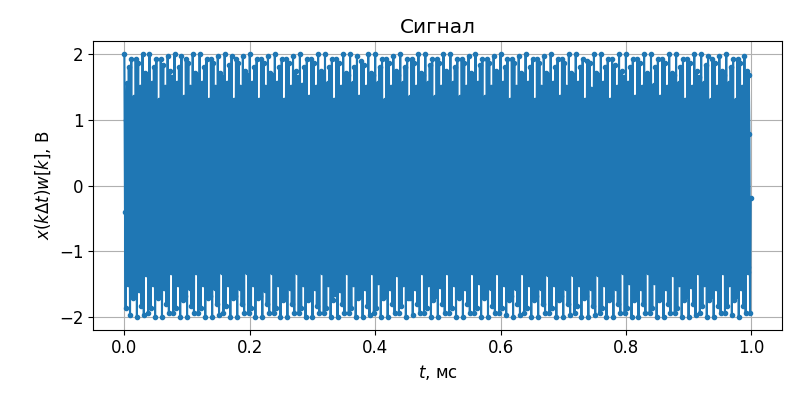

<IPython.core.display.Javascript object>


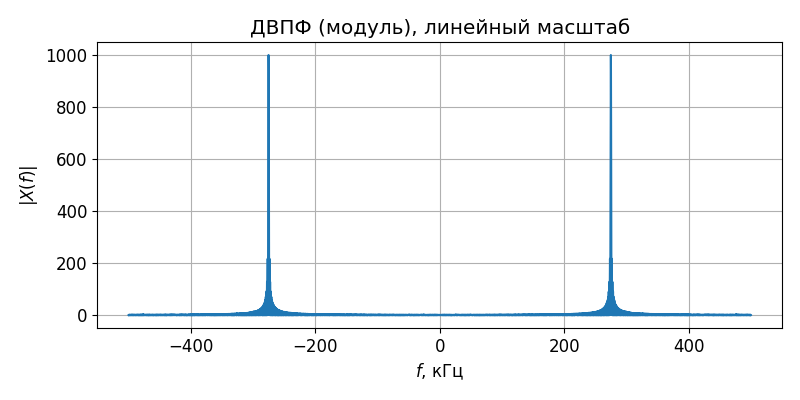

<IPython.core.display.Javascript object>


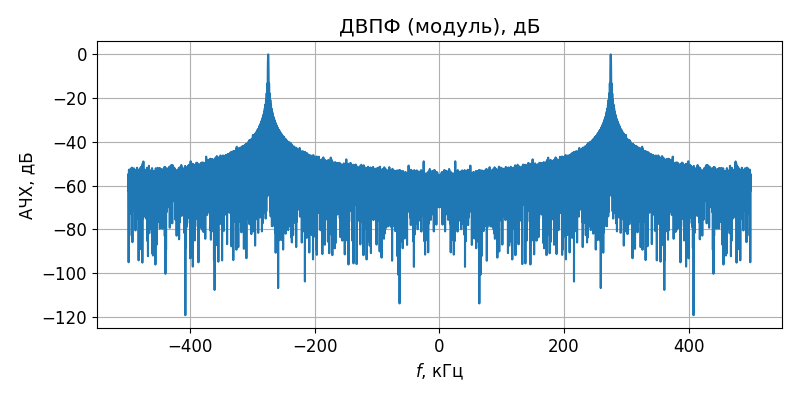

<IPython.core.display.Javascript object>


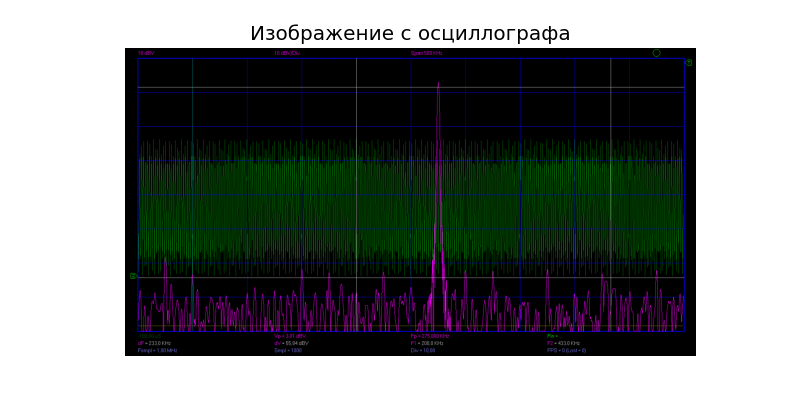

In [16]:
analyse(file='1.1(2).txt', const_level=2, window='boxcar')

# Результат
 * Положения главных максимумов не совпадают

<IPython.core.display.Javascript object>


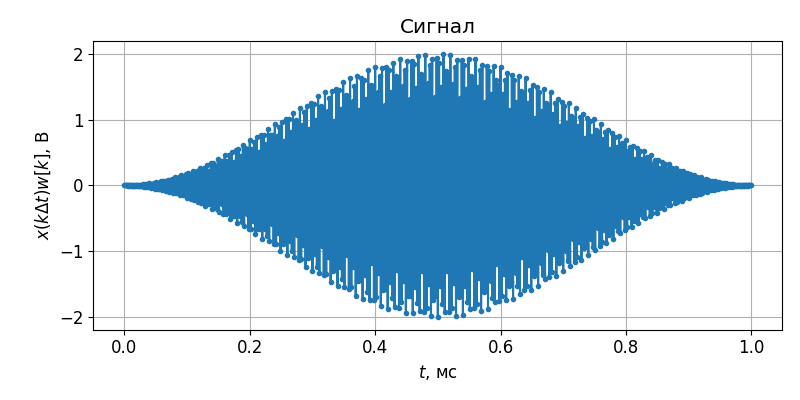

<IPython.core.display.Javascript object>


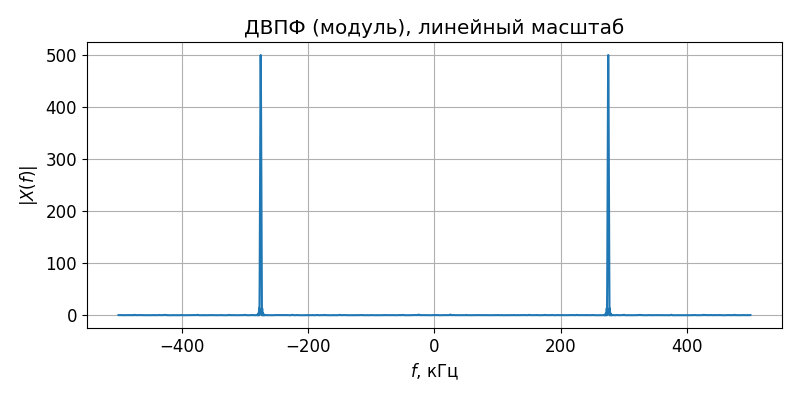

<IPython.core.display.Javascript object>


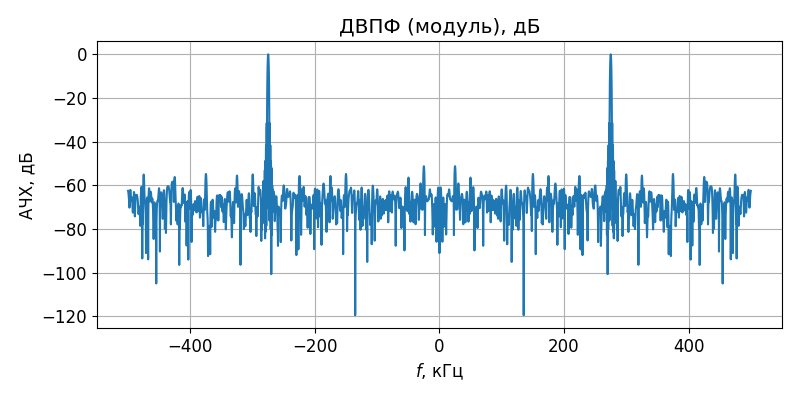

<IPython.core.display.Javascript object>


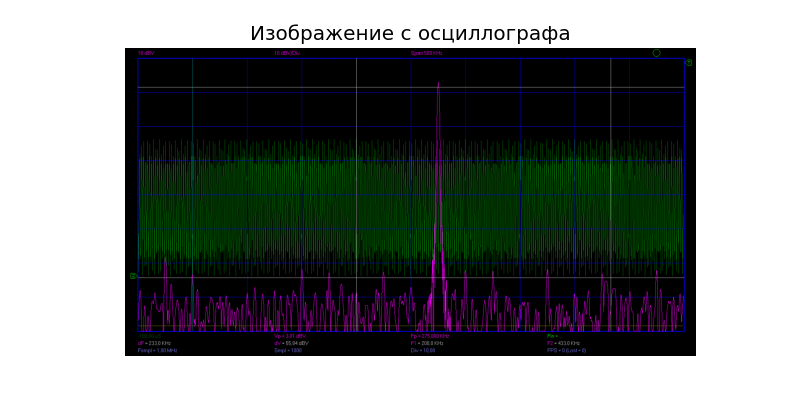

In [17]:
analyse(file='1.1(2).txt', const_level=2, window='hann')

# Результат
 * Положения главных максимумов не совпадают

# Задача 1.2

## Пункт 1

Импульс длительностью 1 мкс, и периодом следования 8 мкс

<IPython.core.display.Javascript object>


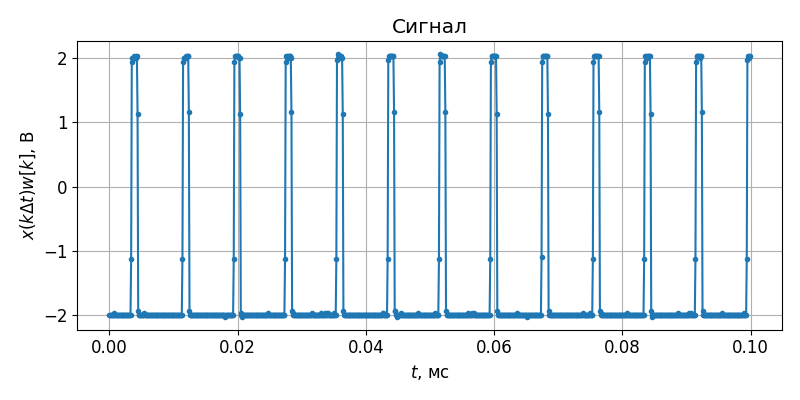

<IPython.core.display.Javascript object>


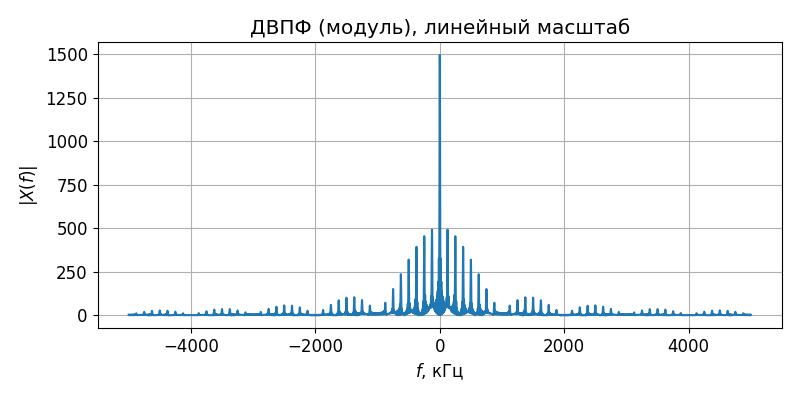

<IPython.core.display.Javascript object>


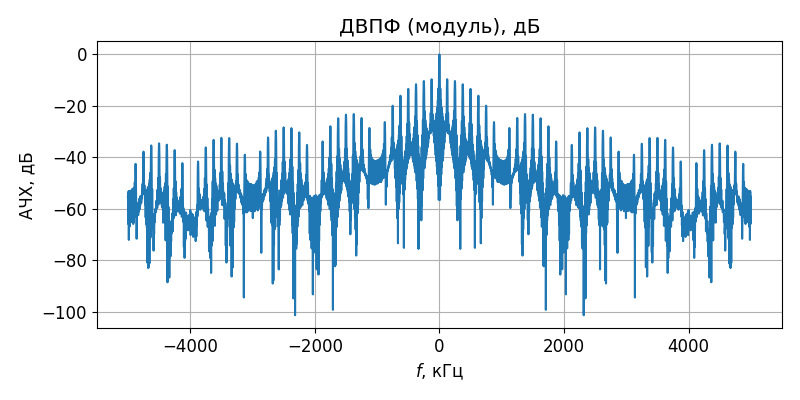

<IPython.core.display.Javascript object>


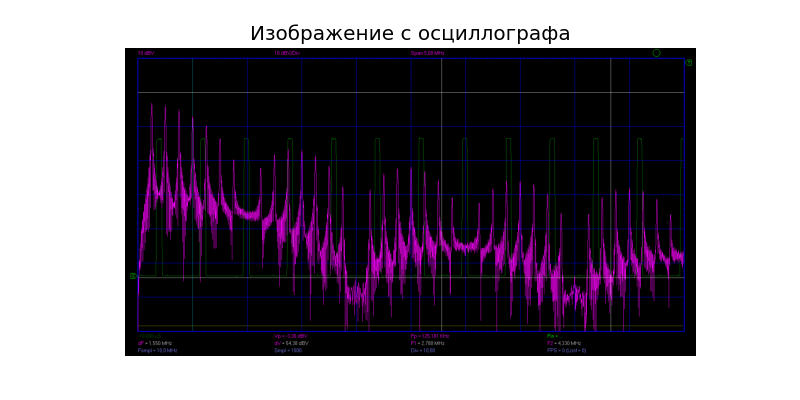

In [18]:
analyse(file='1.2(1).txt', const_level=2, window='boxcar')

# Результат
 * Видно, что АЧХ сигнала полученные с осциллографа и при помощи обработки данных на python совпадают

## Пункт 2

Посмотрим на АЧХ для инвертированной последовательности. Импульс длительностью 7 мкс, и периодом следования 8 мкс

<IPython.core.display.Javascript object>


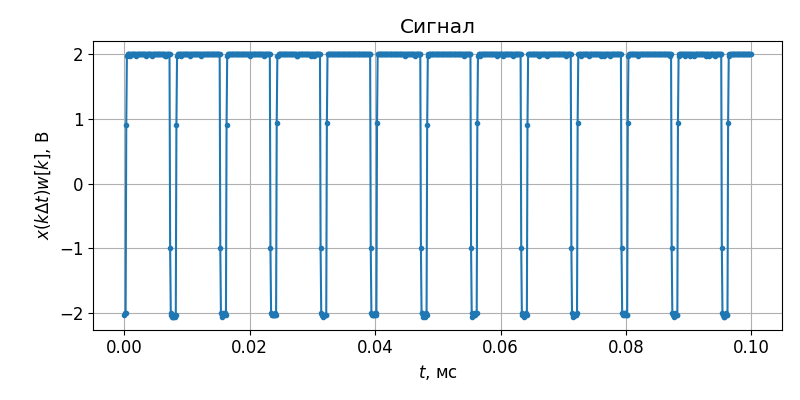

<IPython.core.display.Javascript object>


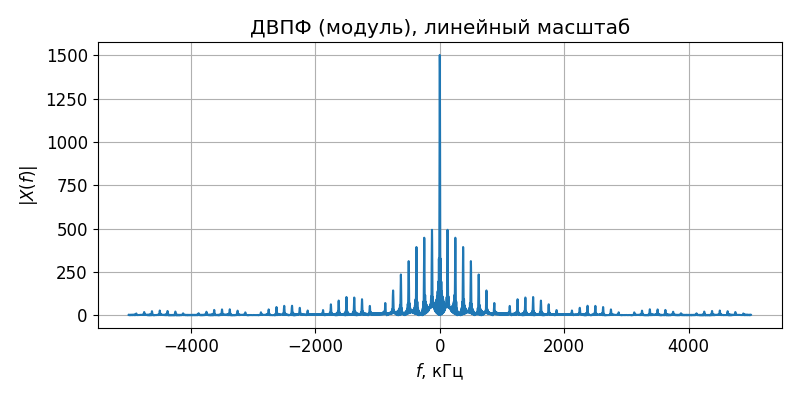

<IPython.core.display.Javascript object>


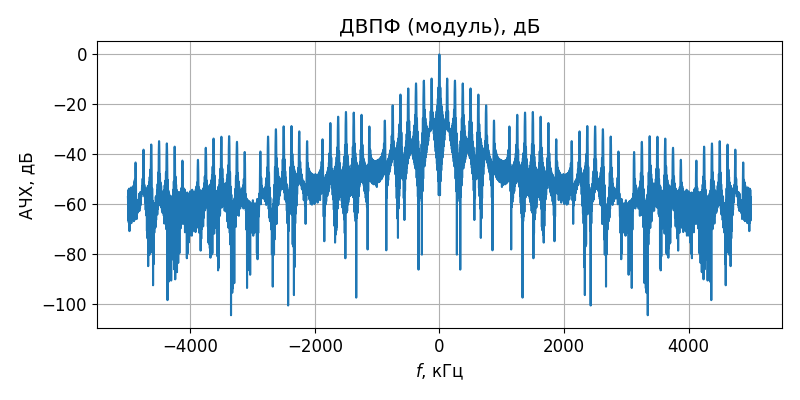

<IPython.core.display.Javascript object>


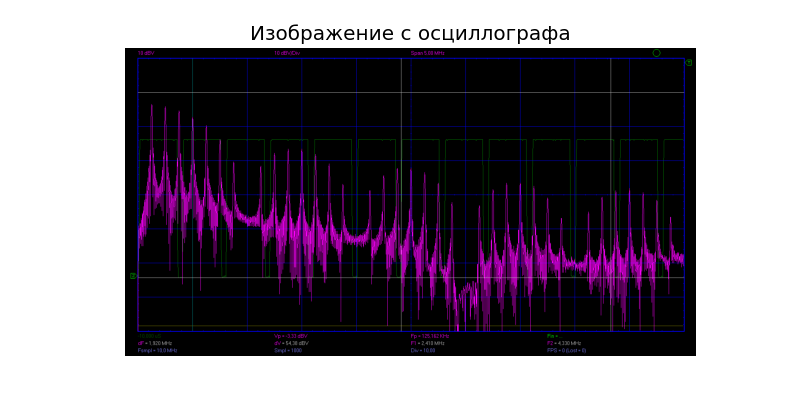

In [19]:
analyse(file='1.2(2).txt', const_level=2, window='boxcar')

# Результат
 * Для инвертированной последовательности также можем наблюдать свопадение между АЧХ сигнала полученным с осциллографа и при помощи обработки данных на python

# Задача 2.1

## Пункт 1

Посмотрим на полосовые сигналы для каналов 0, 4 и 10

Видим, что $f_{dmin}$ = 100 кГц

<IPython.core.display.Javascript object>


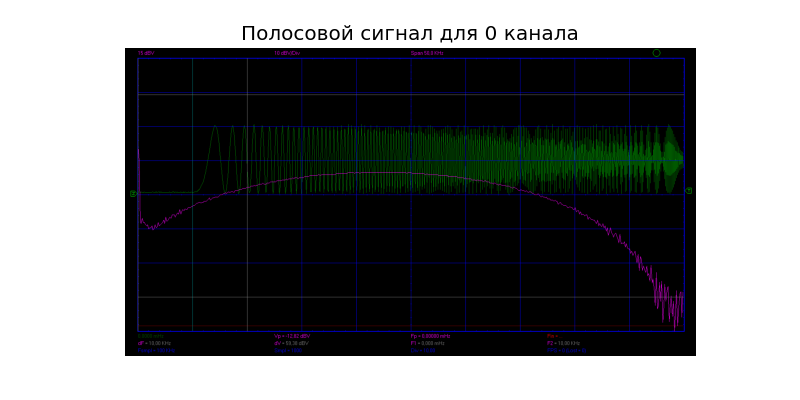

<IPython.core.display.Javascript object>


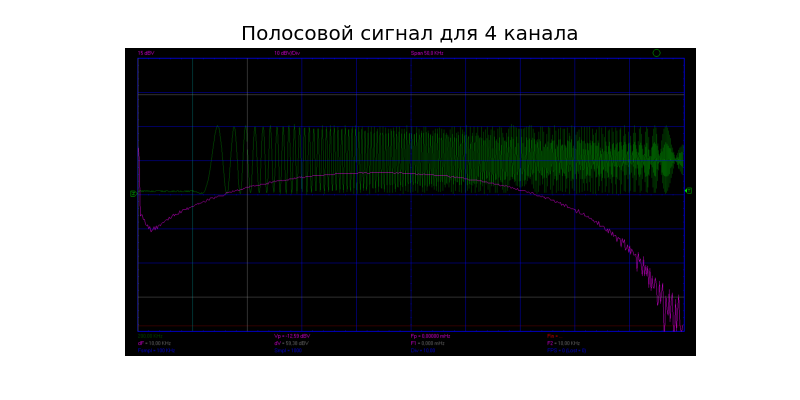

<IPython.core.display.Javascript object>


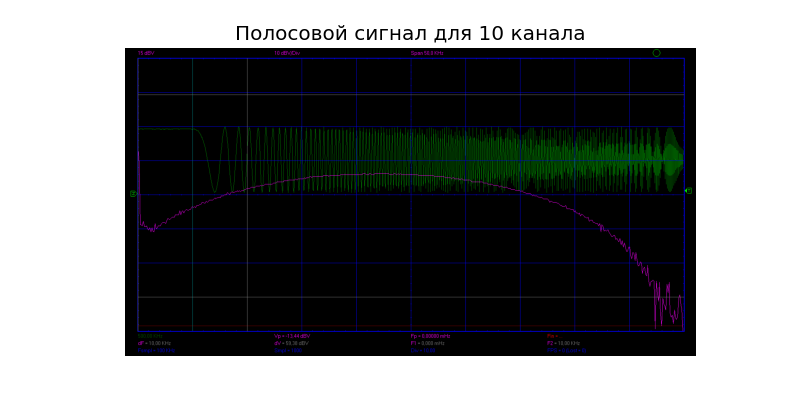

# Результаты
 
 * Вне зависимости от канал частота дискретизации и спектр один и тот же

## Пункт 2

Возьмем в два раза большую частоту дискретизации

<IPython.core.display.Javascript object>


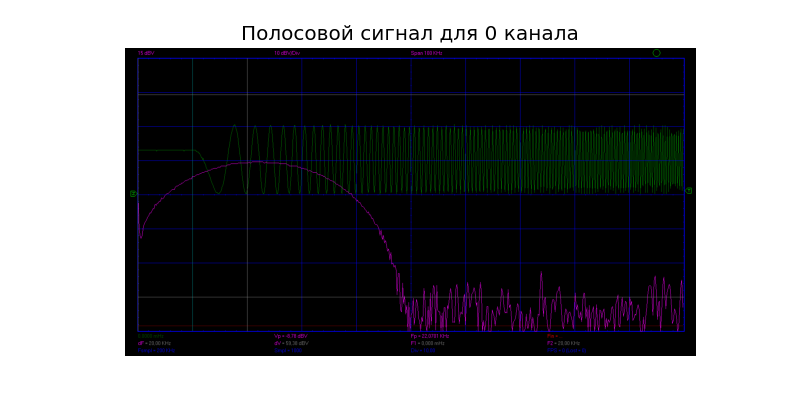

<IPython.core.display.Javascript object>


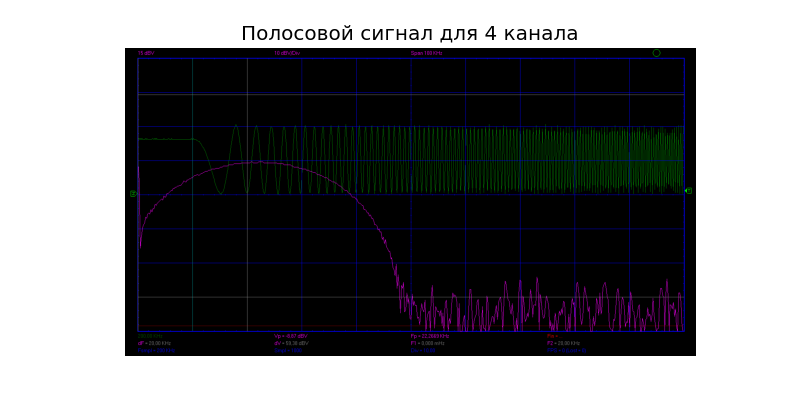

<IPython.core.display.Javascript object>


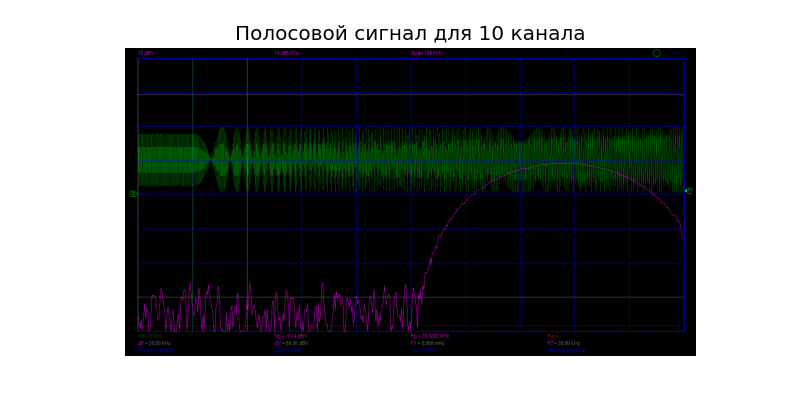

# Результаты
 
 * Спектр у 10 канала откличается, так как для 10 канала получается нечетное количество смещений (5 смещений)